# Sandbox for developing Python Code
Benefit: Can run interactively

In [2]:
import os as os
import socket as socket
import sys as sys
import matplotlib.pyplot as plt
import numpy as np
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
sys.path.append("./python3/") 
from postprocessing import load_Postprocessing
from plot.plot_posterior import plot_posterior
from main import HMM_Full

sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")  # hack to get development package first in path
from hapBLOCK.IO.h5_load import get_opp_homos_f

compute-a-16-116.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.


### Test Code

### Example Data

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 1.4135 Morgan
Gaps bigger than 0.1 cM: 120
Maximum Gap: 5.0000 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 300.9536 mB
Total Log likelihood: -83642.556
Fraction Markers above IBD cutoff: 0.7695
Merged n=0 gaps < 0.01 M
Called n=5 IBD Blocks > 4.0 cM
Longest Block: 7.43 cM
Successfully saved output to ./output/empirical/test/COR001_COR002/
Fraction Markers above IBD cutoff: 0.7695
Merged n=0 gaps < 0.01 M
Called n=5 IBD Blocks > 4.0 cM
Longest Block: 7.43 cM
Successfully saved output to ./output/empirical/test/COR001_COR002/
Filtering to 0.99 GP variants: 0.712x
Filtering to 0.99 GP variants: 0.657x
Filtering to common GP variants: 0.536x


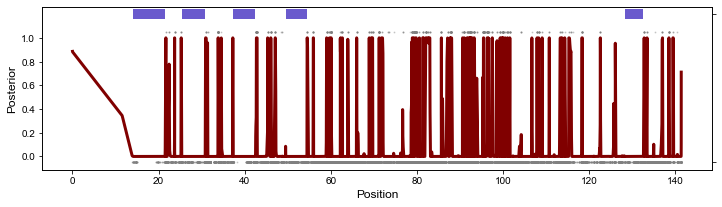

CPU times: user 1.13 s, sys: 29.2 ms, total: 1.16 s
Wall time: 1.26 s


In [100]:
%%time
ch = 15
iid1 = "I18193"
iid2 = "I18199"

h = HMM_Full(folder_in="./data/hdf5/1240k_v43/ch", l_model="hdf5", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast", p_model="hapROH",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 0.1, ibd_out = 10, ibd_jump = 500)
h.l_obj.set_params(iids=[iid1, iid2], ch=ch)
h.p_obj.set_params(iid=f"{iid1}_{iid2}", ch=ch, folder="./output/empirical/test/COR001_COR002/", save=2, 
                   ibd_min_l=0.04, max_gap = 0.01, cutoff_post=0.999, merge=True)
post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()
df_ibd, _, _ = h.p_obj.call_roh(r_vec, post)
o_homos, m = get_opp_homos_f(iid1=iid1, iid2=iid2, 
                             f_path='/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v43/ch', ch=ch)

plot_posterior(post=post, het=o_homos, het_m=m, xlim=[],
               morgan=r_vec, min_cm=4, df_ibd=df_ibd, fs_l=12, show=True)